<a href="https://colab.research.google.com/github/Alinabutt/Alinabutt.github.io/blob/main/UPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [6]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

Step 1: for each round *n* we consider two numbers for each advertisement *i*


*   Ni(n) = the number of times the advert *i* was selected up to round *n*
*   Ri(n) = the sum of rewards of the advert *i* up to round *n*

Step 2: From these 2 numbers we compute:

* The average reward of advert *i* up to round *n*
* The confidence interval at round *n*

Step 3: We select the advert *i* that has the maximum UCB



In [7]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward


## Visualising the results

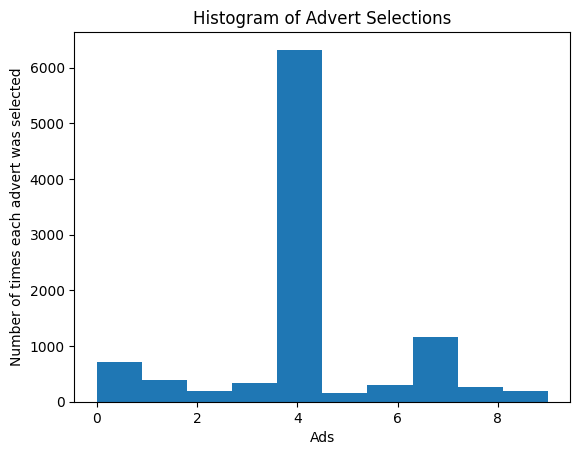

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of Advert Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each advert was selected')
plt.show()